In [ ]:
# imports
import pandas as pd
import gensim
from gensim.corpora.dictionary import Dictionary
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# for visualizig LDA
import pyLDAvis
import pyLDAvis.gensim_models
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# clean df so that speech_id is associated with each speech
speech_info = pd.read_csv('speech_info.csv')

# get video id and create dictionary to link
speech_info['Video ID'] = speech_info['YouTube Speech Link'].str.extract(r'v=([a-zA-Z0-9_-]+)')
vidID_to_speechID = dict(zip(speech_info['Video ID'], speech_info['Speech ID'],))

# get video id for transcripts
clip_transcripts = pd.read_csv('transcript_data_combined.csv')
clip_transcripts['Video ID'] = clip_transcripts['YouTube URL'].str.extract(r'youtu\.be/([a-zA-Z0-9_-]+)')

# replace video id with speech id and save to new column
clip_transcripts['Speech ID'] = clip_transcripts['Video ID'].replace(vidID_to_speechID).astype('int')

<ipython-input-4-aedbedd1f72f>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clip_transcripts['Speech ID'] = clip_transcripts['Video ID'].replace(vidID_to_speechID).astype('int')


In [ ]:
clip_transcripts

,YouTube URL,Chunk Number,Chunk Filename,Transcript,Video ID,Speech ID
0,https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac,1,/Users/milanvaghani/Desktop/Unstructed Machine...,NaN,-ofJu78Wpn0,1
1,https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac,2,/Users/milanvaghani/Desktop/Unstructed Machine...,good evening everyone. Good evening good even...,-ofJu78Wpn0,1
2,https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac,3,/Users/milanvaghani/Desktop/Unstructed Machine...,thank you thank you thank you thank you thank...,-ofJu78Wpn0,1
3,https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac,4,/Users/milanvaghani/Desktop/Unstructed Machine...,thank you all thank you all okay we got to g...,-ofJu78Wpn0,1
4,https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac,5,/Users/milanvaghani/Desktop/Unstructed Machine...,thank you everyone thank you everyone thank yo...,-ofJu78Wpn0,1
...,...,...,...,...,...,...
533,https://youtu.be/Q5TIZnhXX7Q?si=agpeKU04EQ-AtdJ_,177,/Users/milanvaghani/Desktop/Unstructed Machine...,the Liberty Bell it's where the Army whether i...,Q5TIZnhXX7Q,3
534,https://youtu.be/Q5TIZnhXX7Q?si=agpeKU04EQ-AtdJ_,178,/Users/milanvaghani/Desktop/Unstructed Machine...,this is the place where Pennsylvania Patriots ...,Q5TIZnhXX7Q,3
535,https://youtu.be/Q5TIZnhXX7Q?si=agpeKU04EQ-AtdJ_,179,/Users/milanvaghani/Desktop/Unstructed Machine...,come our way no matter what obstacles we must ...,Q5TIZnhXX7Q,3
536,https://youtu.be/Q5TIZnhXX7Q?si=agpeKU04EQ-AtdJ_,180,/Users/milanvaghani/Desktop/Unstructed Machine...,we will make America healthy again we will ma...,Q5TIZnhXX7Q,3


In [ ]:
# inputs ---------------------------------------------------
num_topics = 10
filename = 'transcript_data_combined.csv' # should contain the 30 sec clip transcripts
# ----------------------------------------------------------

# Load your data
df = pd.read_csv(filename)

# Preprocessing: Tokenize and clean the text data
stop_words = set(stopwords.words('english'))

def preprocess(text):
    return [word for word in text.lower().split() if word not in stop_words]

# Apply preprocessing to the 'documents' column
processed_docs = df['Transcript'].dropna().apply(preprocess)

# Create a Gensim dictionary and corpus
dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Train LDA model using Gensim
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Create a DataFrame to store the topics and their words
topics_list = []

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

for idx, topic in lda_model.print_topics(-1):
    # Clean and split the topic string into words
    topic_words = topic.replace('"', '').split(' + ')
    topic_words = [word.split('*')[1].strip() for word in topic_words]
    topics_list.append({'Topic': idx, 'Words': ', '.join(topic_words)})

# Convert the list to a DataFrame
topics_df = pd.DataFrame(topics_list)

# Display the DataFrame nicely
print(topics_df)


Topic 0: 0.015*"know" + 0.008*"people" + 0.008*"he's" + 0.006*"country" + 0.006*"think" + 0.006*"thank" + 0.006*"america" + 0.005*"president" + 0.004*"right" + 0.004*"there's"
Topic 1: 0.011*"going" + 0.009*"one" + 0.007*"country" + 0.007*"right" + 0.007*"people" + 0.007*"would" + 0.006*"take" + 0.006*"middle" + 0.006*"like" + 0.006*"never"
Topic 2: 0.041*"thank" + 0.009*"great" + 0.008*"right" + 0.008*"much" + 0.007*"love" + 0.006*"like" + 0.005*"first" + 0.005*"good" + 0.005*"jobs" + 0.005*"country"
Topic 3: 0.010*"going" + 0.008*"right" + 0.007*"world" + 0.007*"us" + 0.006*"got" + 0.006*"one" + 0.006*"ever" + 0.006*"we're" + 0.006*"country" + 0.006*"america"
Topic 4: 0.024*"going" + 0.012*"we're" + 0.011*"know" + 0.010*"want" + 0.009*"he's" + 0.009*"great" + 0.009*"back" + 0.009*"thank" + 0.007*"people" + 0.007*"one"
Topic 5: 0.013*"people" + 0.009*"one" + 0.007*"know" + 0.006*"americans" + 0.006*"said" + 0.005*"together" + 0.005*"time" + 0.005*"us" + 0.005*"country" + 0.005*"also"


In [ ]:
# topic visualization
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.107277 -0.006682       1        1  18.324483
4      0.071284 -0.034163       2        1  14.900564
1      0.049262 -0.012610       3        1  11.443098
7      0.047097  0.017464       4        1   9.194122
6      0.014819  0.005702       5        1   8.939354
3      0.002552  0.053990       6        1   8.450128
0     -0.047495  0.050025       7        1   8.276861
5     -0.085921  0.106284       8        1   8.139296
2     -0.086393 -0.085461       9        1   6.997924
9     -0.072482 -0.094550      10        1   5.334170, topic_info=         Term        Freq       Total Category  logprob  loglift
4       thank  120.000000  120.000000  Default  30.0000  30.0000
142        us   91.000000   91.000000  Default  29.0000  29.0000
55    america   78.000000   78.000000  Default  28.0000  28.0000
48      going  189.000000  189.000000  Default  27.0000  27.0000
351      said   92.000000   92.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
500      back    3.094325   61.036144  Topic10  -5.6184  -0.0509
451     first    2.811380   28.061425  Topic10  -5.7143   0.6303
257     never    3.014907   65.677420  Topic10  -5.6444  -0.1501
354  american    2.761716   39.109589  Topic10  -5.7321   0.2805
198      like    2.783159   79.097415  Topic10  -5.7244  -0.4161

[764 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1698      3  0.614511  $28,000
2695      6  0.629369  $40,000
2696      6  0.631217   $5,000
2598     10  0.664115   $6,000
668       7  0.218255      100
...     ...       ...      ...
165       7  0.078063    years
165       8  0.058548    years
165       9  0.019516    years
165      10  0.019516    years
3161      1  0.856044    yemen

[1794 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 5, 2, 8, 7, 4, 1, 6, 3, 10])

In [ ]:
s_index = list(df['Transcript'].dropna().index)  # index must match index of original df

for topic_number in range(num_topics):
    # Extract the probability for the current topic for each document
    topic_probs = [
        dict(lda_model.get_document_topics(bow)).get(topic_number, 0)  # get probability or 0 if topic not present
        for bow in corpus
    ]
    # Create a Series with the extracted probabilities and add it to the DataFrame
    topic_series = pd.Series(topic_probs, index=s_index)
    df[f"topic_{topic_number}_prob"] = topic_series

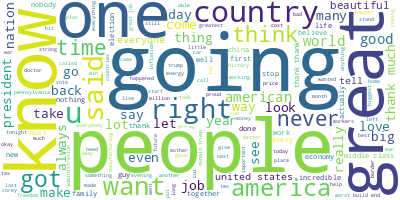

In [ ]:
#!pip install wordcloud
# consider additional stop words based on word cloud
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ' '.join(processed_docs.map(lambda x: ' '.join(x)))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [ ]:
#!pip install bertopic
#!pip install bertopic[visualization]
#!pip install bertopic[spacy]

import pandas as pd
from bertopic import BERTopic
import spacy
from sentence_transformers import SentenceTransformer

# Load your data
df = pd.read_csv('transcript_data_combined.csv')

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# Define a preprocessing function to remove stop words and handle NaN values
def preprocess_text(text):
    # Check if text is a string, if not convert to string and replace nan to empty
    if type(text) is not str:
        text = str(text).replace('nan', '')
    # Return empty if string is empty
    if len(text.strip()) == 0:
        return ''
    doc = nlp(text)
    return ' '.join(token.text for token in doc if not token.is_stop)

# Preprocess the text data and remove stop words
df['Processed Transcript'] = df['Transcript'].apply(preprocess_text)
docs = df['Processed Transcript'].tolist()

# Set the desired number of topics and embedding model
desired_number_of_topics = 10  # Set this higher to encourage more topics
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")  # Alternative embedding model

# Create a BERTopic model with increased min_topic_size and a custom embedding model
topic_model = BERTopic(
    language="english",
    calculate_probabilities=True,
    verbose=True,
    min_topic_size=2,  # Lower min_topic_size for more granular topics
    nr_topics=desired_number_of_topics,  # Set the number of topics here
    embedding_model=embedding_model  # Use custom embedding model for better differentiation
)

# Fit the model to your documents
topics, probs = topic_model.fit_transform(docs)

# Print the topics
topic_info = topic_model.get_topic_info()
print(topic_info)


2024-10-13 04:18:13,092 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/17 [00:00<?, ?it/s]

2024-10-13 04:18:21,687 - BERTopic - Embedding - Completed ✓
2024-10-13 04:18:21,689 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-10-13 04:18:26,274 - BERTopic - Dimensionality - Completed ✓
2024-10-13 04:18:26,276 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-10-13 04:18:26,566 - BERTopic - Cluster - Completed ✓
2024-10-13 04:18:26,568 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-10-13 04:18:26,742 - BERTopic - Representation - Completed ✓
2024-10-13 04:18:26,748 - BERTopic - Topic reduction - Reducing number of topics
2024-10-13 04:18:26,882 - BERTopic - Topic reduction - Reduced number of topics from 79 to 10


   Topic  Count                                Name  \
0     -1    116       -1_going_country_people_great   
1      0    159      0_going_people_country_america   
2      1    107            1_going_middle_tax_class   
3      2     40             2_thank_great_job_right   
4      3     30       3_secret_people_blood_bullets   
5      4     29     4_family_love_father_incredible   
6      5     24            5_election_vote_know_win   
7      6     15  6_prosecutor_consider_women_states   
8      7     14                          7_thank___   
9      8      4       8_israel_gaza_suffering_biden   

                                      Representation  \
0  [going, country, people, great, world, know, s...   
1  [going, people, country, america, know, great,...   
2  [going, middle, tax, class, america, energy, e...   
3  [thank, great, job, right, guy, mike, people, ...   
4  [secret, people, blood, bullets, sniper, great...   
5  [family, love, father, incredible, thank, moth...   
6 

In [ ]:
# Print the topics
topic_model.get_topic_info()



,Topic,Count,Name,Representation,Representative_Docs
0,-1,116,-1_going_country_people_great,"[going, country, people, great, world, know, s...",[stock market higher prior covid coming incred...
1,0,159,0_going_people_country_america,"[going, people, country, america, know, great,...",[Democrats want people come country come count...
2,1,107,1_going_middle_tax_class,"[going, middle, tax, class, america, energy, e...",[Aurora area small town big city president bri...
3,2,40,2_thank_great_job_right,"[thank, great, job, right, guy, mike, people, ...",[thank Doctor great job thank thank Ellis than...
4,3,30,3_secret_people_blood_bullets,"[secret, people, blood, bullets, sniper, great...",[right hand ear brought hand covered blood abs...
5,4,29,4_family_love_father_incredible,"[family, love, father, incredible, thank, moth...",[husband good thing good thing husband Corey...
6,5,24,5_election_vote_know_win,"[election, vote, know, win, important, freedom...",[okay matter election decided thousand points ...
7,6,15,6_prosecutor_consider_women_states,"[prosecutor, consider, women, states, court, u...",[sense fight American people courthouse Wh...
8,7,14,7_thank___,"[thank, , , , , , , , , ]","[, , thank]"
9,8,4,8_israel_gaza_suffering_biden,"[israel, gaza, suffering, biden, defend, clear...",[including unspeakable sexual violence massacr...


In [ ]:
# Visualize the topics
topic_model.visualize_topics()



In [ ]:
# Visualize the barchart of the topics
topic_model.visualize_barchart()

In [ ]:
# Imports and setup
import pandas as pd
from bertopic import BERTopic
import spacy
from sentence_transformers import SentenceTransformer

# Load your data
df = pd.read_csv('transcript_data_combined.csv')

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# Define a preprocessing function to remove stop words and handle NaN values
def preprocess_text(text):
    if type(text) is not str:
        text = str(text).replace('nan', '')
    if len(text.strip()) == 0:
        return ''
    doc = nlp(text)
    return ' '.join(token.text for token in doc if not token.is_stop)

# Preprocess the text data and remove stop words
df['Processed Transcript'] = df['Transcript'].apply(preprocess_text)
docs = df['Processed Transcript'].tolist()

# Set the desired number of topics and embedding model
desired_number_of_topics = 10
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Create a BERTopic model with a custom embedding model
topic_model = BERTopic(
    language="english",
    calculate_probabilities=True,
    verbose=True,
    min_topic_size=2,
    nr_topics=desired_number_of_topics,
    embedding_model=embedding_model
)

# Fit the model to your documents
topics, probs = topic_model.fit_transform(docs)

# Add the 'Topic' column to your DataFrame
df['Topic'] = topics  # Assign the topic for each row in the DataFrame

# Print or save the DataFrame with topics included
print(df.head())
df.to_csv('transcript_data_with_topics.csv', index=False)

# Print topic information
topic_info = topic_model.get_topic_info()
print(topic_info)

2024-10-13 04:23:50,043 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/17 [00:00<?, ?it/s]

2024-10-13 04:23:59,399 - BERTopic - Embedding - Completed ✓
2024-10-13 04:23:59,402 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-10-13 04:24:04,267 - BERTopic - Dimensionality - Completed ✓
2024-10-13 04:24:04,270 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-10-13 04:24:04,462 - BERTopic - Cluster - Completed ✓
2024-10-13 04:24:04,464 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-10-13 04:24:04,588 - BERTopic - Representation - Completed ✓
2024-10-13 04:24:04,590 - BERTopic - Topic reduction - Reducing number of topics
2024-10-13 04:24:04,662 - BERTopic - Topic reduction - Reduced number of topics from 83 to 10


                                        YouTube URL  Chunk Number  \
0  https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac             1   
1  https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac             2   
2  https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac             3   
3  https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac             4   
4  https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac             5   

                                      Chunk Filename  \
0  /Users/milanvaghani/Desktop/Unstructed Machine...   
1  /Users/milanvaghani/Desktop/Unstructed Machine...   
2  /Users/milanvaghani/Desktop/Unstructed Machine...   
3  /Users/milanvaghani/Desktop/Unstructed Machine...   
4  /Users/milanvaghani/Desktop/Unstructed Machine...   

                                          Transcript  \
0                                                NaN   
1  good evening everyone. Good evening  good even...   
2  thank you thank you thank you thank you  thank...   
3  thank you all  thank 